# In this Notebook, we will demonstrate the issues with potential auto-correlation in datasets

An issue with the cross validation of models trained on SeaFlow data is that each data point is an hour past and a km or two after the last one.  This means that if you randlomly sample the data for testing and training sets, the chance of training on data that was collected right next to the testing data point is very high.  The nutrient data will be nearly exactly the same, so it's effectively seeing the same data twice.  This will result it a much better error rate from cross validation compared to what the model is capable of when predicting on data it hasn't seen.  

In [1]:
# Set a working directory
#!pip install GitPython
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)

In [2]:
# running the functions notebook so we can use those at will
%run 'cross_validation/functions.ipynb'

Index(['time', 'cruise', 'lat', 'lon', 'biomass', 'sss', 'sst', 'ugos', 'vgos',
       'Fe', 'O2', 'NO3', 'PO4', 'Si', 'ALK', 'hours_since_sunrise'],
      dtype='object')
(4679, 11)
<class 'numpy.ndarray'>
(4679,)


In [3]:
#loading packages for random forest modeling
#!pip install sklearn 
#!pip install forestci
from sklearn.model_selection import train_test_split
import joblib

### Here is the same RMSE vs Testing : Training ration graph 

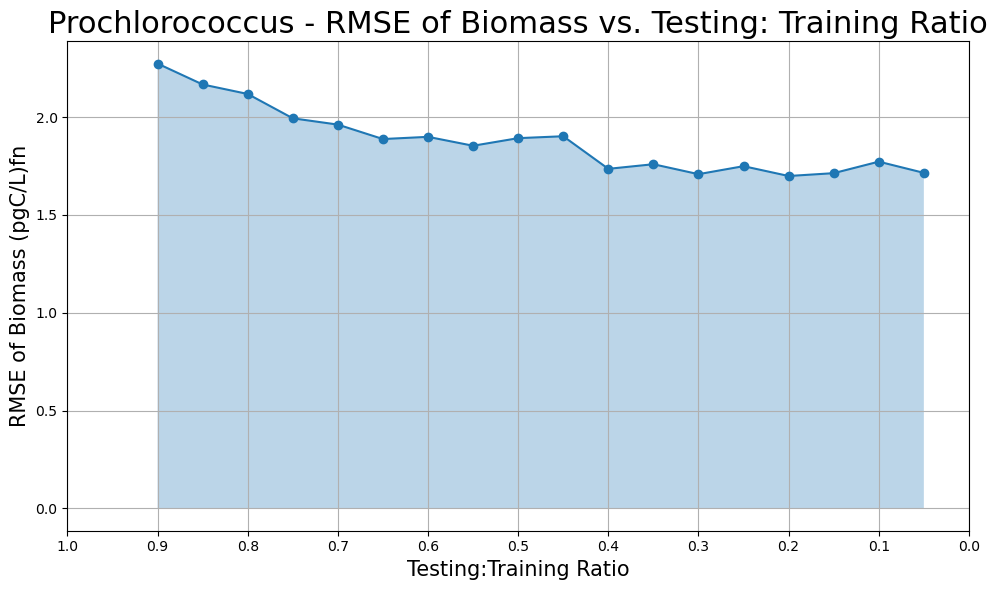

In [4]:
R_RMSEs = testing_training_ratio_random(features = features_pro, labels = labels_pro,
                                        feature_list=feature_list_pro, title_prefix="Prochlorococcus")

In [5]:
RMSE_fold(5, False)

The RMSE for 5 fold cross validation is:3.0118492484811186


## Random sampling vs K-fold

The random sampling cross validation estimates our RMSE to be ~1.6 at a 20% testing ratio.  However, when we use 5 fold K-fold, we get an RMSE of ~3.  This shows us that the error rate when using random sampling was underestimated by nearly 50% compared to k-fold.